In [1]:
import numpy as np
X = np.array([0,1,2,3,4])
Y = np.array([3,5,4,6,7])

In [2]:
%load_ext rpy2.ipython 

In [3]:
%Rpush X Y
%R lm(Y~X)$coef

<FloatVector - Python:0x10e27d8c0 / R:0x7ffe04988e08>
[3.200000, 0.900000]

In [4]:
Xr = X - X.mean(); Yr = Y - Y.mean()
slope = (Xr*Yr).sum() / (Xr**2).sum()
intercept = Y.mean() - X.mean() * slope
(intercept, slope)

(3.2000000000000002, 0.90000000000000002)

In [5]:
%R resid(lm(Y~X)); coef(lm(X~Y))

<FloatVector - Python:0x10e27d710 / R:0x7ffe049e16d0>
[-2.500000, 0.900000]

In [6]:
b = %R a=resid(lm(Y~X))
%Rpull a
print a
%R -o a

   1    2    3    4    5 
-0.2  0.9 -1.0  0.1  0.2 




Call:
lm(formula = Y ~ X)

Residuals:
   1    2    3    4    5 
-0.2  0.9 -1.0  0.1  0.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.2000     0.6164   5.191   0.0139 *
X             0.9000     0.2517   3.576   0.0374 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7958 on 3 degrees of freedom
Multiple R-squared:   0.81,	Adjusted R-squared:  0.7467 
F-statistic: 12.79 on 1 and 3 DF,  p-value: 0.03739



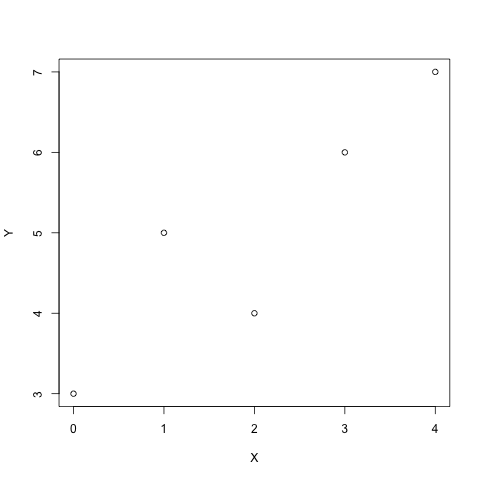

v1 is: [1] 10

v2 is: [1] 10



In [7]:
v1 = %R plot(X,Y); print(summary(lm(Y~X))); vv=mean(X)*mean(Y)
print 'v1 is:', v1
v2 = %R mean(X)*mean(Y)
print 'v2 is:', v2


Call:
lm(formula = Y ~ X)

Residuals:
   1    2    3    4    5 
-0.2  0.9 -1.0  0.1  0.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.2000     0.6164   5.191   0.0139 *
X             0.9000     0.2517   3.576   0.0374 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7958 on 3 degrees of freedom
Multiple R-squared:   0.81,	Adjusted R-squared:  0.7467 
F-statistic: 12.79 on 1 and 3 DF,  p-value: 0.03739



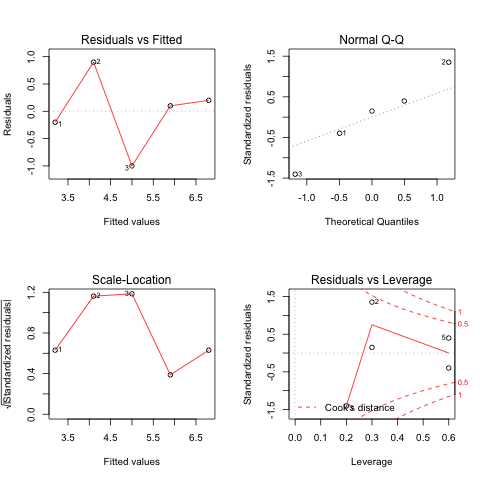

In [8]:
%%R -i X,Y -o XYcoef
XYlm = lm(Y~X)
XYcoef = coef(XYlm)
print(summary(XYlm))
par(mfrow=c(2,2))
plot(XYlm)